In [1]:
import pandas as pd
from scipy.interpolate import CubicSpline, make_interp_spline, splrep, BSpline
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dust_path = "https://www.nbi.dk/~koskinen/Teaching/data/DustLog_forClass.dat"
spline_cubic_path = "https://www.nbi.dk/~koskinen/Teaching/data/SplineCubic.txt"
osc_path = "https://www.nbi.dk/~koskinen/Teaching/data/SplineOsc1.txt"
dust_data = pd.read_csv(dust_path, delimiter=" ", names=["Col1", "Col2"])
spline_cubic_data = pd.read_csv(spline_cubic_path, delimiter=" ", names=["x", "y"])
osc_data = pd.read_csv(osc_path, delimiter=" ", names=["E", "P"])

In [3]:
dust_xdata = dust_data["Col1"].values
dust_ydata = dust_data["Col2"].values
N_interp = 10_000
spline_linspace_dust = np.linspace(
    dust_xdata.min(),
    dust_xdata.max(),
    N_interp,
)
linear_spline_dust = np.interp(
    spline_linspace_dust,
    dust_xdata,
    dust_ydata,
)

cubic_spline_dust_obj = CubicSpline(dust_xdata, dust_ydata)
cubic_spline_dust_vals = cubic_spline_dust_obj(spline_linspace_dust)

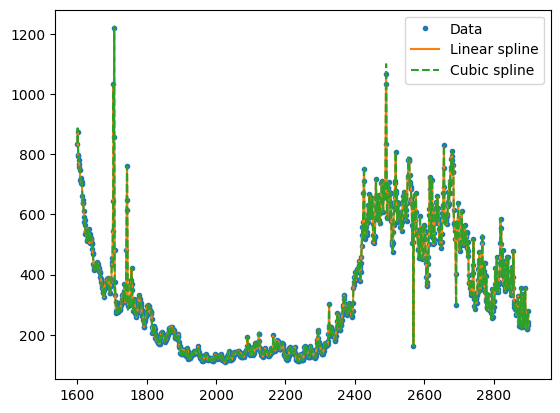

In [4]:
plt.plot(dust_xdata, dust_ydata, ".", label="Data")
plt.plot(spline_linspace_dust, linear_spline_dust, "-", label="Linear spline")
plt.plot(spline_linspace_dust, cubic_spline_dust_vals, "--", label="Cubic spline")
plt.legend()

In [5]:
cs_xdata = spline_cubic_data["x"].values
cs_ydata = spline_cubic_data["y"].values
norm_cs = simpson(y=cs_ydata, x=cs_xdata)
cs_ydata_norm = cs_ydata / norm_cs
spline_linspace_cs = np.linspace(
    cs_xdata.min(),
    cs_xdata.max(),
    N_interp,
)
linear_spline_cs = np.interp(spline_linspace_cs, cs_xdata, cs_ydata_norm)
quadratic_spline_obj_cs = make_interp_spline(cs_xdata, cs_ydata_norm, k=2)
quadratic_spline_vals_cs = quadratic_spline_obj_cs(spline_linspace_cs)
cubic_spline_obj_cs = CubicSpline(cs_xdata, cs_ydata_norm)
cubic_spline_vals_cs = cubic_spline_obj_cs(spline_linspace_cs)

cs_int_min1 = 1e-5
cs_int_max1 = 0.01
cs_int_min2 = 0.03
cs_int_max2 = 0.1

cs_int1_lin = simpson(
    y=linear_spline_cs[
        (spline_linspace_cs >= cs_int_min1) & (spline_linspace_cs <= cs_int_max1)
    ],
    x=spline_linspace_cs[
        (spline_linspace_cs >= cs_int_min1) & (spline_linspace_cs <= cs_int_max1)
    ],
)

cs_int1_quad = simpson(
    y=quadratic_spline_vals_cs[
        (spline_linspace_cs >= cs_int_min1) & (spline_linspace_cs <= cs_int_max1)
    ],
    x=spline_linspace_cs[
        (spline_linspace_cs >= cs_int_min1) & (spline_linspace_cs <= cs_int_max1)
    ],
)

cs_int1_cub = simpson(
    y=cubic_spline_vals_cs[
        (spline_linspace_cs >= cs_int_min1) & (spline_linspace_cs <= cs_int_max1)
    ],
    x=spline_linspace_cs[
        (spline_linspace_cs >= cs_int_min1) & (spline_linspace_cs <= cs_int_max1)
    ],
)


cs_int2_lin = simpson(
    y=linear_spline_cs[
        (spline_linspace_cs >= cs_int_min2) & (spline_linspace_cs <= cs_int_max2)
    ],
    x=spline_linspace_cs[
        (spline_linspace_cs >= cs_int_min2) & (spline_linspace_cs <= cs_int_max2)
    ],
)

cs_int2_quad = simpson(
    y=quadratic_spline_vals_cs[
        (spline_linspace_cs >= cs_int_min2) & (spline_linspace_cs <= cs_int_max2)
    ],
    x=spline_linspace_cs[
        (spline_linspace_cs >= cs_int_min2) & (spline_linspace_cs <= cs_int_max2)
    ],
)

cs_int2_cub = simpson(
    y=cubic_spline_vals_cs[
        (spline_linspace_cs >= cs_int_min2) & (spline_linspace_cs <= cs_int_max2)
    ],
    x=spline_linspace_cs[
        (spline_linspace_cs >= cs_int_min2) & (spline_linspace_cs <= cs_int_max2)
    ],
)

In [6]:
print(
    f"\nLinear spline integral [{cs_int_min1, cs_int_max1}]: {cs_int1_lin}",
    f"\nQuadratic spline integral [{cs_int_min1, cs_int_max1}]: {cs_int1_quad}",
    f"\nCubic spline integral [{cs_int_min1, cs_int_max1}]: {cs_int1_cub}",
)


Linear spline integral [(1e-05, 0.01)]: 0.7352868565962298 
Quadratic spline integral [(1e-05, 0.01)]: 0.6769358916798163 
Cubic spline integral [(1e-05, 0.01)]: 0.6472942392796052


In [7]:
print(
    f"\nLinear spline integral [{cs_int_min2, cs_int_max2}]: {cs_int2_lin}",
    f"\nQuadratic spline integral [{cs_int_min2, cs_int_max2}]: {cs_int2_quad}",
    f"\nCubic spline integral [{cs_int_min2, cs_int_max2}]: {cs_int2_cub}",
)


Linear spline integral [(0.03, 0.1)]: 0.026356270050974375 
Quadratic spline integral [(0.03, 0.1)]: -0.08750227576417119 
Cubic spline integral [(0.03, 0.1)]: -0.05757195393098382


In [57]:
osc_xdata = osc_data["E"].values
osc_ydata = osc_data["P"].values
spline_linspace_ocs = np.linspace(
    osc_xdata.min(),
    osc_xdata.max(),
    N_interp,
)
tck_osc = splrep(osc_xdata, osc_ydata, s=0)
osc_smooth_spline = BSpline(*tck_osc)(spline_linspace_ocs)

(0.01, 2.1)

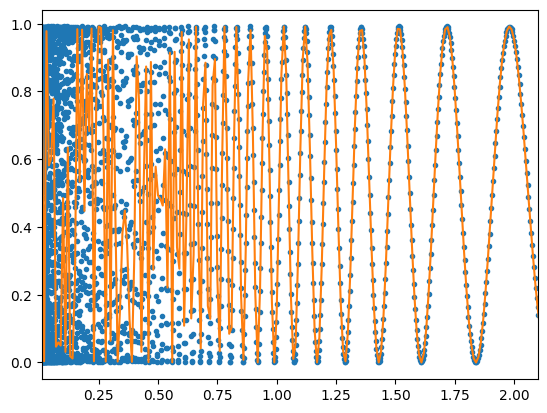

In [58]:
plt.plot(osc_xdata, osc_ydata, ".")
plt.plot(spline_linspace_ocs, osc_smooth_spline, "-")
plt.xlim(osc_xdata.min(), 2.1)

In [59]:
mean_spline_low_sampling = np.mean(osc_smooth_spline[spline_linspace_cs <= 1.0])
print(f"Mean value of spline for low sampling region: {mean_spline_low_sampling:.2f}")

Mean value of spline for low sampling region: 0.47
